In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import utilities as ut
import cv2
import pandas as pd
import numpy as np

dataset_paths = ut.images_paths("Images/WarpedCards/")
base_cards_paths = ut.images_paths("Images/Cards/")
raw_cards_paths = ut.images_paths("Images/DatasetRaw/")

work_dir= ut.Config.working_directory




In [19]:
def append_data(row):
    data=row["moments"].copy()
    data = np.append(data,row["hue"])
    return data

In [20]:
#Generating dataset with the generated images from Dataset_Generator.ipynb 
labels = []
hu_moments = []
average_hue=[]
samples=[]
for path in dataset_paths:
    #Thr dataset is build 
    properties = ut.label_properties(path)
    samples.append(properties)
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
    
df_generated = pd.DataFrame(samples)
df_generated["moments"] = hu_moments
df_generated["hue"] = average_hue
df_generated["data"] = df_generated.apply(append_data,axis=1)
print(df_generated)

    value seed label index                                            moments  \
0       A    S    AS    AS  [0.2581170659162546, 0.018958783626795758, 0.0...   
1       3    C     3     C  [0.21092238211018885, 0.013110537093808081, 0....   
2       R    B    RB     R  [0.2632066499494603, 0.033466400462784346, 0.0...   
3       7    C     7     C  [0.22462626181335188, 0.017300361531756, 0.000...   
4       R    B    RB     R  [0.25821845467799387, 0.03096020625588564, 0.0...   
..    ...  ...   ...   ...                                                ...   
955     8    S    8S     8  [0.3318009829753296, 0.050319365024874, 0.0020...   
956     6    S     6     S  [0.4968799422586564, 0.20454985849541488, 0.00...   
957     6    B     6     B  [0.318713215770589, 0.07313561392319623, 0.003...   
958     7    C     7     C  [0.21807169927113218, 0.013013423671528523, 0....   
959     A    C    AC    AC  [0.24321402458498348, 0.0282827186936967, 3.59...   

           hue             

In [21]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in base_cards_paths:
    samples.append(ut.label_class_only(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_base = pd.DataFrame(samples)
df_base["moments"] = hu_moments
df_base["hue"] = average_hue
df_base["data"] = df_base.apply(append_data,axis=1)
print(df_base)


   value seed label                                            moments  \
0      7    C     C  [0.22225804081103337, 0.01594525095038476, 0.0...   
1      A    C    AC  [0.24305554848722474, 0.028763687428324046, 2....   
2      R    B     R  [0.26686700528342994, 0.03424285951895691, 0.0...   
3      7    S     7  [0.7296534270326875, 0.1525365272091704, 0.238...   
4      8    C     8  [0.40925092982787187, 0.10357475336507306, 0.0...   
5      4    O     4  [0.24825667613837687, 0.01543724752987511, 0.0...   
6      6    C     C  [0.248431159173635, 0.028764490485784156, 0.00...   
7      R    S     R  [0.26074346777962304, 0.030003292785587676, 0....   
8      4    C     C  [0.2142792002949413, 0.014672966581150875, 0.0...   
9      3    S    3S  [0.3549009320799103, 0.04035568095240079, 0.00...   
10     2    C    2C  [0.1870315616498156, 0.00036129249108887343, 0...   
11     5    S     5  [0.3911050708229767, 0.050549019411397944, 0.0...   
12     8    O     8  [0.44017008618482

In [23]:
labels = []
hu_moments = []
samples=[]
average_hue=[]
for path in raw_cards_paths:
    samples.append(ut.label_properties_raw(path))
    image = cv2.imread(path)
    binary_image,contours = ut.preprocess_image(image)
    hue = ut.average_hue_of_contours(image, [contours[0]])
    average_hue.append(hue)
    moments = cv2.moments(contours[0])
    hu_moments.append(cv2.HuMoments(moments).flatten())
df_raw = pd.DataFrame(samples)
df_raw["moments"] = hu_moments
df_raw["hue"] = average_hue
df_raw["data"] = df_raw.apply(append_data,axis=1)
print(df_raw)

    value seed label index                                            moments  \
0       6    S     6     5  [0.383983240910995, 0.047983811066619766, 0.02...   
1       9    B    9B     5  [0.28931174673063087, 0.022326599154748286, 0....   
2       7    C     7     1  [0.2828378056098332, 0.03678020997637223, 0.00...   
3       3    C     3     4  [0.35973695345914136, 0.06275699092305194, 0.0...   
4       4    O    4O     1  [0.20021113881672867, 0.00792466795431179, 0.0...   
..    ...  ...   ...   ...                                                ...   
179     R    O    RO     3  [0.34851618899648384, 0.03643704346651127, 0.0...   
180     7    O     7     4  [0.34524673790854987, 0.048394303635566654, 0....   
181     9    O    9O     4  [0.25525496737629705, 0.011855235117309034, 0....   
182     6    B     6     2  [0.2276228615367406, 0.0044767918611743965, 0....   
183     5    C     5     5  [0.28401538678041793, 0.007281268085141282, 0....   

           hue             

In [24]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaling.fit(df_generated["data"].tolist())
Scaled_data=scaling.transform(df_generated["data"].tolist())
x=Scaled_data
print(x.shape)

(960, 8)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,df_generated["label"].tolist(), test_size=0.2, random_state=42)
"""X_test = x
X_train = scaling.transform(df_base_filtered["data"].to_list())
y_test = df_raw_filtered["label"].tolist()
y_train = df_base_filtered["label"].tolist()"""


'X_test = x\nX_train = scaling.transform(df_base_filtered["data"].to_list())\ny_test = df_raw_filtered["label"].tolist()\ny_train = df_base_filtered["label"].tolist()'

In [26]:
from sklearn.ensemble import RandomForestClassifier
f_clf = RandomForestClassifier(n_estimators=10)
f_clf = f_clf.fit(X_train,y_train)
predictions = f_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.9791666666666666
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         6
          2B       1.00      1.00      1.00         6
          2C       1.00      1.00      1.00         5
          2S       1.00      1.00      1.00         4
           3       0.91      1.00      0.95        10
          3B       1.00      1.00      1.00         5
          3S       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        10
          4O       1.00      1.00      1.00         5
          4S       1.00      1.00      1.00         8
           5       1.00      0.92      0.96        12
          5S       1.00      1.00      1.00         2
           6       0.77      1.00      0.87        10
           7       1.00      0.82      0.90        17
          7S       1.00      1.00      1.00         8
          8B       1.00      1.00      1.00         5
          8C       1.00      

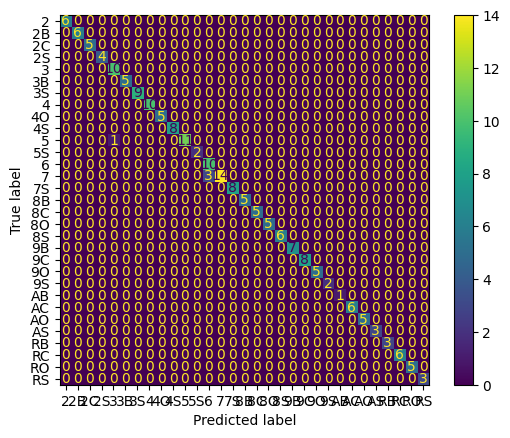

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=f_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=f_clf.classes_)
disp.plot()

In [28]:
import joblib
joblib.dump(f_clf,ut.Config.working_directory+"forest_classifier.sav")
joblib.dump(scaling,ut.Config.working_directory+"scaler.sav")

['workingDirectory/scaler.sav']

In [29]:
test_image = cv2.imread('Images/DatasetCropped/7B-1.jpg')
#test_image = cv2.imread(work_dir+"opencv_frame_0.png")
image = cv2.imread(path)
binary_image,contours_test = ut.preprocess_image(test_image)
hue = ut.average_hue_of_contours(test_image, [contours_test[0]])
moments = cv2.moments(contours_test[0])
hu_moments_test= cv2.HuMoments(moments).flatten()
data = hu_moments_test.copy()
data = np.append(data,hue)
print(data)
data=scaling.transform(data.reshape(1, -1))
result=f_clf.predict(data)
print(result)

[ 3.77841009e-01  1.14804399e-01  4.99268412e-03  3.30446207e-03
  1.34211879e-05  1.11840577e-03 -1.50341450e-07  7.04692877e+01]
['7']


In [30]:
counter=0
if result in ['O','B','S','C']:
    counter=1
    for contour in contours_test[1:7]:
        print(counter)
        moments = cv2.moments(contour)
        hu_moments_test= cv2.HuMoments(moments).flatten()
        hue = ut.average_hue_of_contours(test_image, [contour])
        data = hu_moments_test.copy()
        data = np.append(data,hue)
        data=scaling.transform(data.reshape(1, -1))
        if f_clf.predict(data)== result:
            counter+=1
        else: break    
if(counter==0):
    counter=''

print("{}{}".format(result,counter))

['7']
